In [1]:
import pandas as pd
import numpy as np
from IPython.display import Markdown

from utils.common.merge_df import (merge_forcast_and_train_df,
                                   remove_NaN_rows)
from utils.common.train_model import (train_model_cv,
                                      train_model_stacking)
from utils.common.test_model import (test_model_cv,
                                     test_model_stacking)
from utils.common.create_features import (create_seasons,
                                          create_datetime_features,
                                          create_adjusted_values,
                                          create_rolling_avg,
                                            astral,
                                            deseasonalized_temperature,
                                            create_lag_features,
                                            add_time_period_column,
                                            shift_radiation)

In [2]:
# Lade Dateien
df_forecast = pd.read_parquet('../Daten/forecasts.parquet')
df_test1 = pd.read_parquet('../Daten/energy_test1.parquet')
df_test2 = pd.read_parquet('../Daten/energy_test2.parquet')
df_train = pd.read_parquet('../Daten/energy_train.parquet')

# preprocessing
df_train, df_forecast = remove_NaN_rows(df_train, df_forecast)

# merge 
merged_df = merge_forcast_and_train_df(df_forecast, df_train)
merged_test_df = merge_forcast_and_train_df(df_forecast, df_test1)
merged_test2_df = merge_forcast_and_train_df(df_forecast, df_test2)

# create feature
merged_df = await create_seasons(merged_df)

# # Erstelle Spalten für Stunden und Monate
merged_df = await create_datetime_features(merged_df)
merged_df = await astral(merged_df)
merged_df = await add_time_period_column(merged_df)
merged_df = await shift_radiation(merged_df)
# merged_df = await deseasonalized_temperature(merged_df)

# # Erstelle Spalten für die adjustierten Werte
# # Können wir wieder auskommentieren wenn wir das wieder testen 
merged_df = await create_adjusted_values(merged_df)
merged_df = await create_rolling_avg(merged_df)
merged_df = await create_lag_features(merged_df)

# # create features for test data
merged_test_df = await create_seasons(merged_test_df)

merged_test_df = await create_seasons(merged_test_df)
merged_test2_df = await create_seasons(merged_test2_df)

merged_test_df = await create_datetime_features(merged_test_df)
merged_test2_df = await create_datetime_features(merged_test2_df)

merged_test_df = await astral(merged_test_df)
merged_test2_df = await astral(merged_test2_df)

merged_test_df = await deseasonalized_temperature(merged_test_df)
merged_test2_df = await deseasonalized_temperature(merged_test2_df)

merged_test_df = await create_rolling_avg(merged_test_df)
merged_test2_df = await create_rolling_avg(merged_test2_df)

merged_test_df = await create_adjusted_values(merged_test_df)
merged_test2_df = await create_adjusted_values(merged_test2_df)

merged_test_df = await add_time_period_column(merged_test_df)
merged_test_df = await shift_radiation(merged_test_df)

merged_test2_df = await add_time_period_column(merged_test2_df)
merged_test2_df = await shift_radiation(merged_test2_df)

#merged_test_df = await create_lag_features(merged_test_df)
#merged_test2_df = await create_lag_features(merged_test2_df)
merged_df

/home/datata1/Documents/ML1/Analyse_Training/utils/common/create_features.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rolling_Avg_SolarDownwardRadiation'].fillna(df['Median_SolarDownwardRadiation'], inplace=True)
/home/datata1/Documents/ML1/Analyse_Training/utils/common/create_features.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the interme

,dtm,ref_datetime,Solar_capacity_mwp,Solar_MWh,valid_time,SolarDownwardRadiation,CloudCover,Temperature,Weather Model,valid_datetime,...,SolarDownwardRadiation_Temperature,Median_SolarDownwardRadiation,Rolling_Avg_SolarDownwardRadiation,rolling_mean_radiation,rolling_mean_temperature,radiation_rolling_std,radiation_rolling_max,radiation_lag1,radiation_lag2,temp_lag1
0,2020-09-21 00:00:00+00:00,2020-09-20 00:00:00+00:00,2130.510089,0.0,24,0.000000,0.327759,12.216522,DWD ICON,2020-09-21 00:00:00+00:00,...,0.000000,0.000000,0.000000,0.000000,12.228267,0.000000,0.000000,0.000000,0.000000,0.000000
1,2020-09-21 00:00:00+00:00,2020-09-20 00:00:00+00:00,2130.510089,0.0,24,0.000000,0.002000,12.240011,NCEP GFS,2020-09-21 00:00:00+00:00,...,0.000000,0.000000,0.000000,0.002946,12.157506,0.000000,0.000000,0.000000,0.000000,12.216522
2,2020-09-21 01:00:00+00:00,2020-09-20 00:00:00+00:00,2130.510089,0.0,25,0.008838,0.436067,12.015985,DWD ICON,2020-09-21 01:00:00+00:00,...,0.106196,0.004419,0.004419,0.002946,12.096160,0.005103,0.008838,0.000000,0.000000,12.240011
3,2020-09-21 01:00:00+00:00,2020-09-20 00:00:00+00:00,2130.510089,0.0,25,0.000000,0.003000,12.032483,NCEP GFS,2020-09-21 01:00:00+00:00,...,0.000000,0.004419,0.002209,0.008074,11.954034,0.005103,0.008838,0.008838,0.000000,12.015985
4,2020-09-21 02:00:00+00:00,2020-09-20 00:00:00+00:00,2130.510089,0.0,26,0.015384,0.468752,11.813635,DWD ICON,2020-09-21 02:00:00+00:00,...,0.181740,0.007692,0.006055,0.005128,11.893166,0.007720,0.015384,0.000000,0.008838,12.032483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39400,2022-12-31 21:00:00+00:00,2022-12-30 18:00:00+00:00,2212.678300,0.0,27,0.000000,1.000000,12.386409,NCEP GFS,2022-12-31 21:00:00+00:00,...,0.000000,0.000000,0.000000,0.000000,11.966100,0.000000,0.000000,0.000000,0.000000,11.899714
39401,2022-12-31 22:00:00+00:00,2022-12-30 18:00:00+00:00,2212.678300,0.0,28,0.000000,0.999715,11.612177,DWD ICON,2022-12-31 22:00:00+00:00,...,0.000000,0.000000,0.000000,0.000000,12.177125,0.000000,0.000000,0.000000,0.000000,12.386409
39402,2022-12-31 22:00:00+00:00,2022-12-30 18:00:00+00:00,2212.678300,0.0,28,0.000000,1.000000,12.532788,NCEP GFS,2022-12-31 22:00:00+00:00,...,0.000000,0.000000,0.000000,0.000716,11.762085,0.000000,0.000000,0.000000,0.000000,11.612177
39403,2022-12-31 23:00:00+00:00,2022-12-30 18:00:00+00:00,2237.476835,0.0,29,0.002148,1.000000,11.141291,DWD ICON,2022-12-31 23:00:00+00:00,...,0.023936,0.001074,0.000537,0.000716,12.045937,0.001241,0.002148,0.000000,0.000000,12.532788


# Aufgabe 5




### Lineares Model



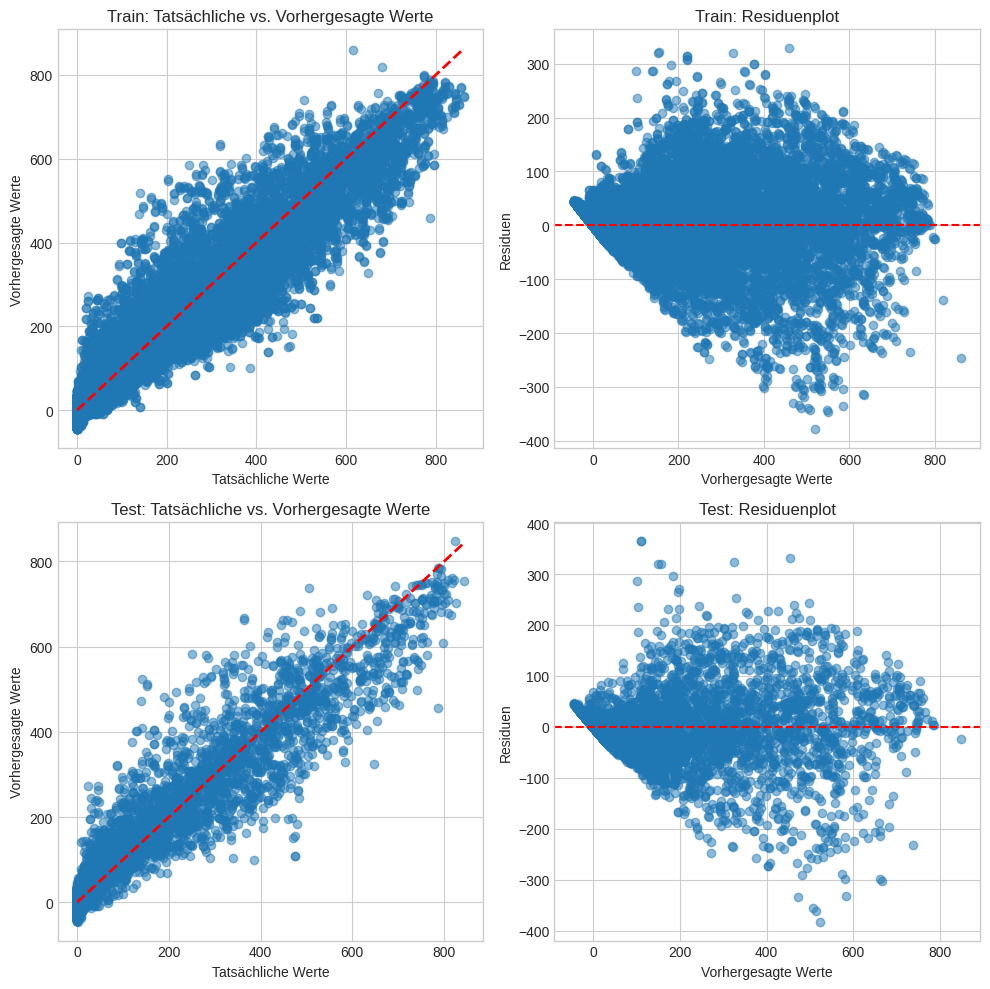

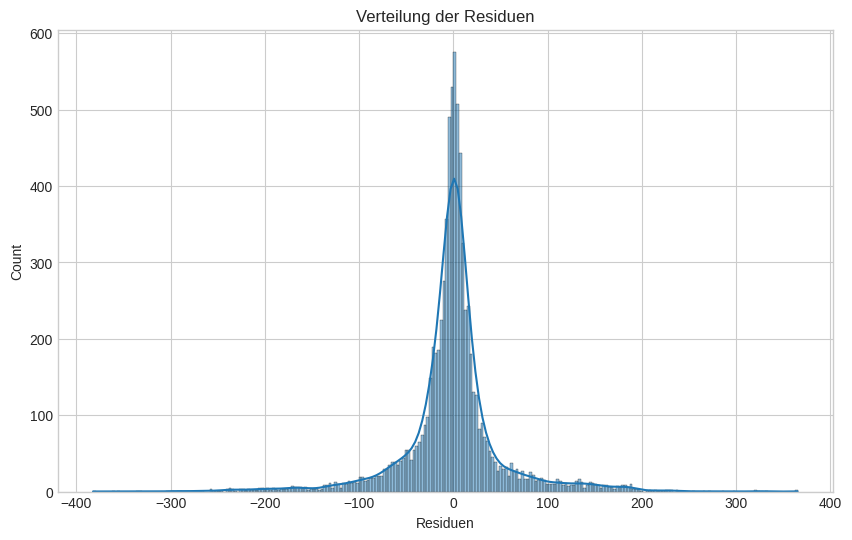

In [17]:
param_grid_ridge = {
    'alpha': np.linspace(0.1, 50, 50),
}

merged_df_copy = merged_df.copy()

pipeline, evaluation_md, test_col, best_params = train_model_cv(merged_df_copy, 
                                                      ["SolarDownwardRadiation",
                                                       "hour",
                                                       "week",
                                                       "month",
                                                       "Weather Model",
                                                       "time_period",
                                                       "Season",
                                                       "sun_altitude",
                                                       "sun_azimuth",
                                                       "Solar_Radiation_lag_1h",
                                                       "solar_efficiency",
                                                       "Median_SolarDownwardRadiation"
                                                       ], 
                                                    "Solar_MWh",
                                                       param_grid_ridge,
                                                       "ridge")

In [4]:
display(Markdown(evaluation_md))

### Ridge(alpha=np.float64(0.1)) Evaluation

| Dataset | R² | RMSE | MAE | Rows | Columns |
|---------|--------:|------------:|--------:|-------:|-------:|
| Train   | 0.91797 | 52.72 | 30.47 | 31524 | 12 |
| Test    | 0.91983 | 52.18 | 30.55 | 7881 | 12 |

### Top 10 Coefficients

| Feature Name                       |   Coefficient |
|:-----------------------------------|--------------:|
| num__solar_efficiency              |    413.617    |
| num__SolarDownwardRadiation        |   -408.884    |
| num__Median_SolarDownwardRadiation |    152.922    |
| cat__week_27                       |    -70.2086   |
| cat__week_12                       |     67.5216   |
| cat__week_26                       |    -67.0254   |
| cat__week_15                       |     65.7435   |
| num__sun_altitude                  |     65.3795   |
| cat__week_16                       |     63.5188   |
| cat__week_14                       |     61.0967   |
| cat__time_period_Nacht             |     60.5209   |
| cat__week_29                       |    -59.0039   |
| cat__week_25                       |    -55.3588   |
| cat__week_28                       |    -52.8334   |
| cat__week_35                       |    -50.5478   |
| cat__week_30                       |    -49.3271   |
| cat__week_11                       |     46.5504   |
| cat__week_10                       |     45.8932   |
| cat__month_4                       |    -41.2766   |
| cat__week_34                       |    -40.3485   |
| cat__week_8                        |     39.236    |
| cat__hour_21                       |     35.3861   |
| cat__week_13                       |     34.582    |
| cat__week_6                        |     34.2104   |
| cat__time_period_Nachmittag        |    -33.9606   |
| cat__month_1                       |     33.4201   |
| cat__week_31                       |    -31.3587   |
| cat__hour_18                       |    -30.09     |
| cat__month_12                      |     29.5952   |
| cat__week_5                        |     28.9824   |
| cat__hour_0                        |     24.1371   |
| cat__Season_Frühling               |    -24.0958   |
| cat__time_period_Mittag            |    -23.701    |
| cat__hour_4                        |    -23.2188   |
| cat__month_5                       |    -23.0569   |
| cat__month_3                       |    -21.851    |
| cat__hour_1                        |     21.7926   |
| cat__hour_5                        |     21.6549   |
| cat__time_period_Abend             |     20.3267   |
| cat__month_11                      |     20.2724   |
| cat__week_7                        |     19.6124   |
| cat__hour_23                       |     19.4132   |
| cat__hour_20                       |     17.7423   |
| cat__week_38                       |    -17.7002   |
| cat__week_33                       |    -17.3073   |
| cat__week_24                       |    -17.2276   |
| cat__week_22                       |    -16.7675   |
| cat__Season_Herbst                 |     16.6101   |
| cat__hour_7                        |    -16.5663   |
| cat__week_32                       |    -15.5714   |
| cat__hour_16                       |    -15.1231   |
| cat__week_9                        |     15.0718   |
| cat__week_18                       |     14.9588   |
| cat__hour_14                       |    -14.7039   |
| cat__week_17                       |     14.6403   |
| cat__hour_15                       |    -13.9371   |
| cat__time_period_Morgen            |    -12.997    |
| cat__month_8                       |    -12.6063   |
| cat__week_2                        |     12.2738   |
| cat__hour_2                        |     11.7842   |
| cat__week_50                       |    -11.6482   |
| cat__month_10                      |     11.6199   |
| cat__week_36                       |    -11.403    |
| cat__week_52                       |     11.11     |
| cat__week_40                       |    -10.9135   |
| cat__hour_8                        |    -10.3887   |
| cat__time_period_Vormittag         |    -10.189    |
| cat__month_6                       |    -10.0744   |
| cat__week_1                        |      9.92533  |
| cat__week_23                       |     -9.87848  |
| cat__hour_22                       |      9.67557  |
| cat__hour_11                       |     -9.46583  |
| cat__week_20                       |      9.14654  |
| cat__hour_6                        |     -7.69687  |
| cat__week_3                        |      7.19311  |
| cat__month_7                       |      6.23318  |
| cat__month_2                       |      5.72469  |
| cat__hour_13                       |     -5.63126  |
| cat__hour_17                       |     -4.90036  |
| cat__week_21                       |      4.83237  |
| cat__Season_Sommer                 |      4.73721  |
| cat__week_53                       |      4.34169  |
| cat__week_41                       |     -3.69716  |
| cat__week_47                       |      3.45439  |
| cat__week_46                       |     -3.43451  |
| cat__hour_12                       |     -3.36588  |
| num__Solar_Radiation_lag_1h        |      3.15468  |
| cat__hour_3                        |     -3.06304  |
| cat__week_37                       |     -2.92598  |
| cat__week_43                       |      2.90838  |
| cat__week_51                       |      2.75919  |
| cat__Season_Winter                 |      2.74855  |
| cat__hour_19                       |     -2.71179  |
| cat__week_42                       |     -2.37558  |
| cat__week_49                       |     -2.37207  |
| cat__hour_9                        |     -2.17163  |
| cat__week_4                        |      2.08025  |
| cat__month_9                       |      1.99983  |
| cat__week_45                       |     -1.96357  |
| cat__week_48                       |     -1.76851  |
| cat__week_44                       |      1.5824   |
| cat__hour_10                       |      1.44847  |
| num__sun_azimuth                   |      0.900999 |
| cat__week_39                       |     -0.588962 |
| cat__week_19                       |      0.330214 |
| cat__Weather Model_NCEP GFS        |     -0.163672 |
| cat__Weather Model_DWD ICON        |      0.163672 |

Number of coefficients that are zero: 0/107


### Lohnt sich Hyperparametersuche?

Die Hyperparamtersuche hat keine signifikanten Veränderungen herbeigeführt. 

In [ ]:
# Aufgabe 6: Export für das competition-Tool

merged_test_pred_df = test_model_cv(pipeline, merged_test_df, test_col)
merged_test2_pred_df = test_model_cv(pipeline, merged_test2_df, test_col)

merged_test_pred_df.to_pickle('test_ridge.pkl')
merged_test2_pred_df.to_pickle('test2_ridge.pkl')


___


### EntscheidungsBaum


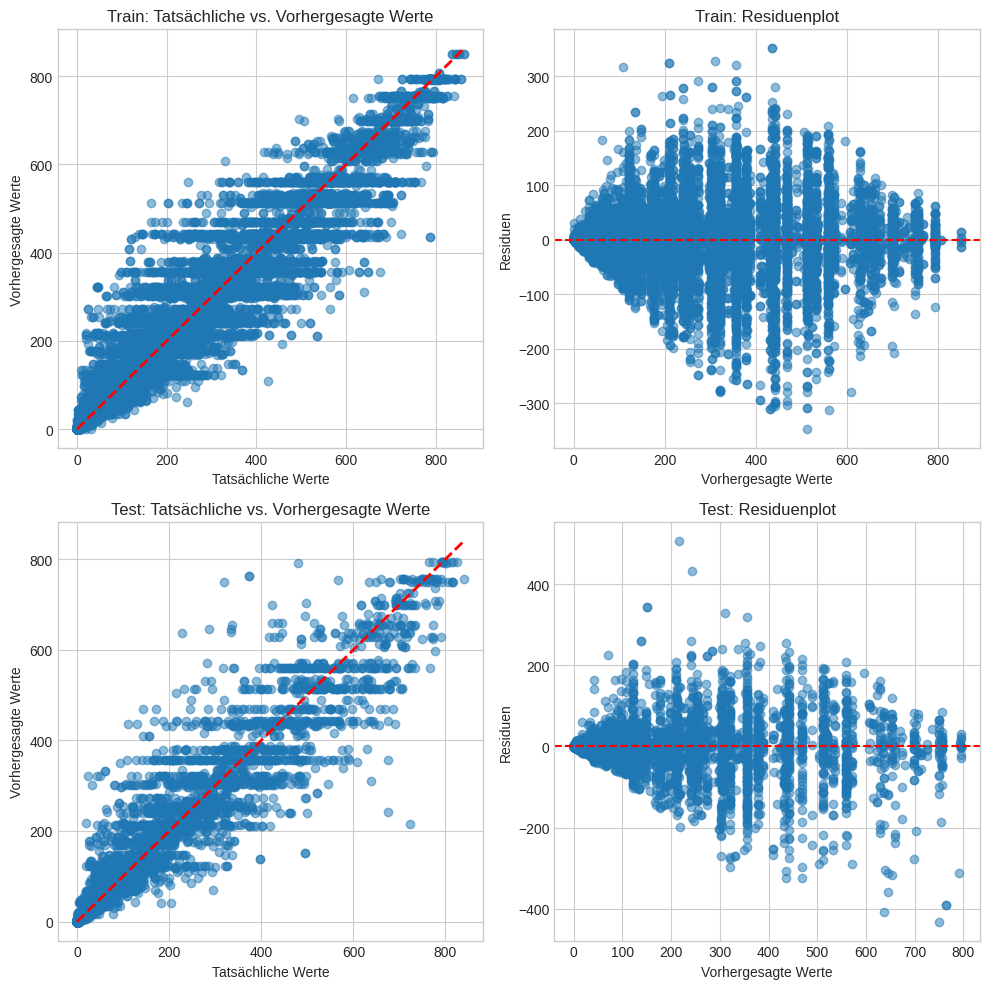

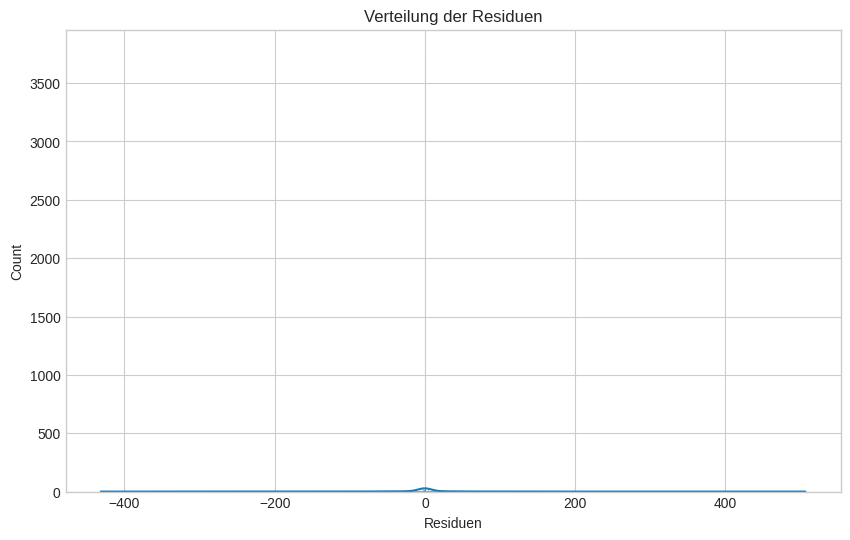

In [ ]:
param_grid_dtr = {
    'splitter': ['best', 'random'],  # Methode zum Auswählen des Splits: 
                                     # 'best' wählt den besten möglichen Split aus, 
                                     # 'random' wählt zufällig aus möglichen Splits.
    
    'max_depth': [None, 5, 10],      # Maximale Tiefe des Baums: 
                                     # None erlaubt unbegrenzte Tiefe, 
                                     # Zahlen begrenzen die Tiefe und verhindern Overfitting.
    
    'min_samples_split': [2, 5, 10], # Minimale Anzahl von Samples, die erforderlich sind, 
                                     # um einen Knoten zu teilen (höhere Werte reduzieren Overfitting).
    
    'min_samples_leaf': [1, 2, 5, 10],  # Minimale Anzahl von Samples, die ein Blatt enthalten muss: 
                                        # Höhere Werte können die Baumkomplexität reduzieren.
    
    'max_features': [None, 'sqrt', 'log2'],  # Maximale Anzahl der Features, die für einen Split verwendet werden: 
                                             # None = alle Features, 'sqrt' = Quadratwurzel der Features, 
                                             # 'log2' = Logarithmus der Anzahl der Features (Basis 2).
    
    'max_leaf_nodes': [None, 10, 100, 1000], # Maximale Anzahl der Blattknoten: 
                                             # Begrenzung reduziert die Komplexität des Baums.
    
    'min_impurity_decrease': [0.0, 0.01, 0.1],  # Minimale Verbesserung der Impurität, die erforderlich ist, 
                                                # um einen Split durchzuführen. Höhere Werte reduzieren die Anzahl der Splits.
}



merged_df_copy = merged_df.copy()

pipeline, evaluation_md, test_col, best_params = train_model_cv(merged_df_copy, 
                                                      ["SolarDownwardRadiation",
                                                       "hour",
                                                       "week",
                                                       "month",
                                                       "Weather Model",
                                                       "time_period",
                                                       "Season",
                                                       "sun_altitude",
                                                       "sun_azimuth",
                                                       "Solar_Radiation_lag_1h",
                                                       "solar_efficiency",
                                                       "Median_SolarDownwardRadiation"
                                                       ], 
                                                    "Solar_MWh",
                                                       param_grid_dtr,
                                                       "DTR")

In [14]:
display(Markdown(evaluation_md))

### DecisionTreeRegressor Evaluation

| Dataset | R² | RMSE | MAE | Rows | Columns |
|---------|--------:|------------:|--------:|-------:|-------:|
| Train   | 0.94578 | 42.96 | 19.35 | 31524 | 12 |
| Test    | 0.91925 | 51.89 | 23.54 | 7881 | 12 |

### Top 10 Feature Importances

| Feature Name                       |   Importance |
|:-----------------------------------|-------------:|
| num__Median_SolarDownwardRadiation |  0.956766    |
| num__sun_azimuth                   |  0.0175495   |
| num__sun_altitude                  |  0.00709037  |
| num__solar_efficiency              |  0.00228135  |
| num__Solar_Radiation_lag_1h        |  0.00219776  |
| cat__week_9                        |  0.0014384   |
| cat__month_2                       |  0.00136575  |
| cat__time_period_Vormittag         |  0.00130782  |
| cat__Season_Winter                 |  0.00116696  |
| cat__week_35                       |  0.000922599 |

Total feature importance (should be 1.0): 1.00


### Lohnt sich Hyperparametersuche?

Overfitting könnte ein Problem sein und wenn man Hyperparameter nutzt die den RMSE maximieren könnte das Overfitting begünstigen.

In [ ]:
# Aufgabe 6: Export für das competition-Tool
merged_test_pred_df = test_model_cv(pipeline, merged_test_df, test_col)
merged_test2_pred_df = test_model_cv(pipeline, merged_test2_df, test_col)

merged_test_pred_df.to_pickle('test_DTR.pkl')
merged_test2_pred_df.to_pickle('test2_DTR.pkl')


___

### Ensemble Model



Starting stacking model training...
Splitting data...
Setting up preprocessing pipeline...
Applying transformations...
['num__SolarDownwardRadiation' 'num__sun_altitude' 'num__sun_azimuth'
 'num__Solar_Radiation_lag_1h' 'num__solar_efficiency'
 'num__Median_SolarDownwardRadiation' 'cat__hour_0' 'cat__hour_1'
 'cat__hour_2' 'cat__hour_3' 'cat__hour_4' 'cat__hour_5' 'cat__hour_6'
 'cat__hour_7' 'cat__hour_8' 'cat__hour_9' 'cat__hour_10' 'cat__hour_11'
 'cat__hour_12' 'cat__hour_13' 'cat__hour_14' 'cat__hour_15'
 'cat__hour_16' 'cat__hour_17' 'cat__hour_18' 'cat__hour_19'
 'cat__hour_20' 'cat__hour_21' 'cat__hour_22' 'cat__hour_23' 'cat__week_1'
 'cat__week_2' 'cat__week_3' 'cat__week_4' 'cat__week_5' 'cat__week_6'
 'cat__week_7' 'cat__week_8' 'cat__week_9' 'cat__week_10' 'cat__week_11'
 'cat__week_12' 'cat__week_13' 'cat__week_14' 'cat__week_15'
 'cat__week_16' 'cat__week_17' 'cat__week_18' 'cat__week_19'
 'cat__week_20' 'cat__week_21' 'cat__week_22' 'cat__week_23'
 'cat__week_24' 'cat__

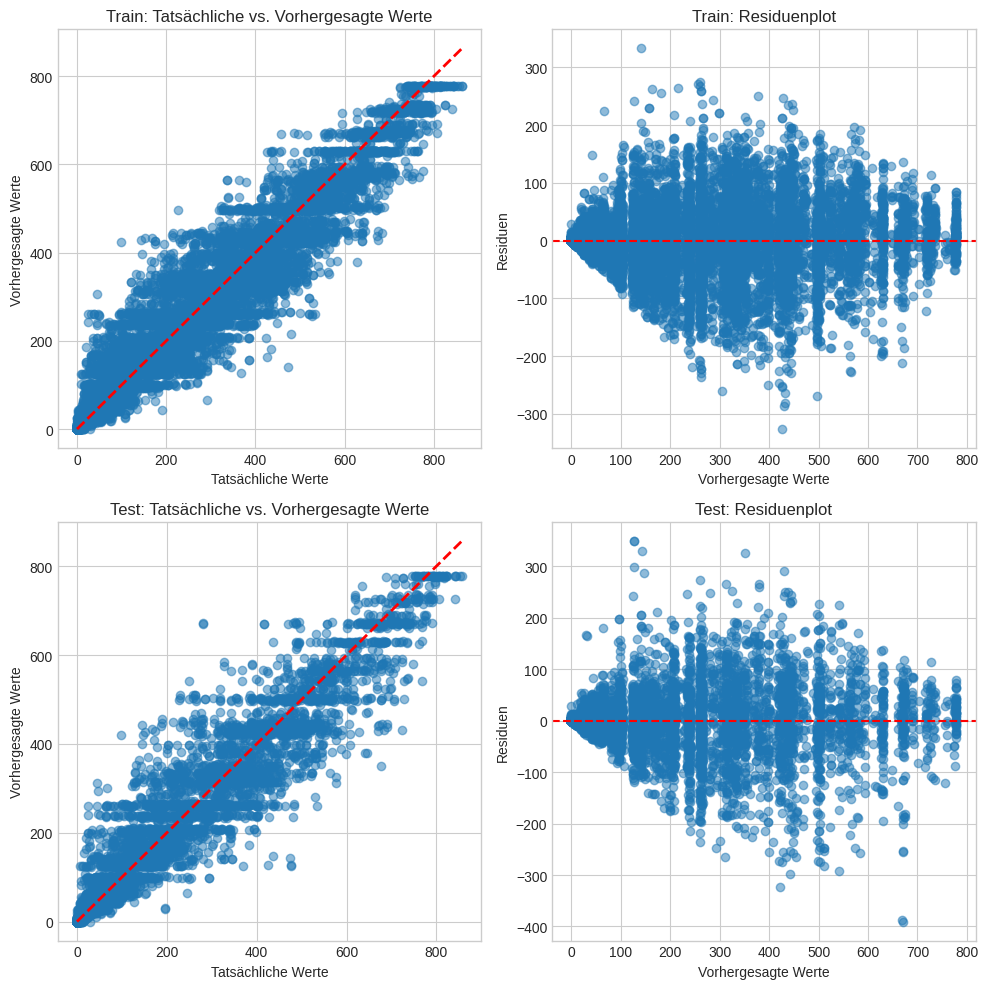

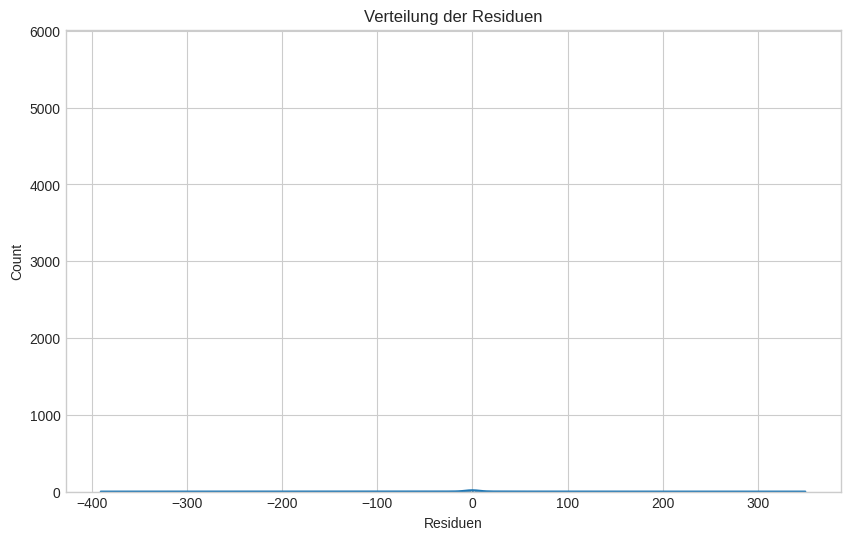

In [ ]:
param_grid_dtr = {      }

merged_df_copy = merged_df.copy()

pipeline, evaluation_md, test_col, best_params, preprocessor = train_model_stacking(merged_df_copy, 
                                                      ["SolarDownwardRadiation",
                                                       "hour",
                                                       "week",
                                                       "month",
                                                       "Weather Model",
                                                       "time_period",
                                                       "Season",
                                                       "sun_altitude",
                                                       "sun_azimuth",
                                                       "Solar_Radiation_lag_1h",
                                                       "solar_efficiency",
                                                       "Median_SolarDownwardRadiation"
                                                       ], 
                                                    "Solar_MWh",
                                                       param_grid_dtr)


___

In [11]:
display(Markdown(evaluation_md))

### Stacking Model Evaluation

| Dataset | R² | RMSE | MAE | Rows | Columns |
|---------|-------|------|-----|------|----------|
| Train   | 0.95483 | 39.18 | 18.64 | 27583 | 107 |
| Test    | 0.93740 | 45.92 | 21.20 | 11822 | 107 |

Base Learners:
- Ridge Regression
- DecisionTreeRegressor
- GradientBoost

Best CV Score (RMSE): 46.29


In [ ]:
# Aufgabe 6: Export für das competition-Tool
merged_test_pred_df = test_model_stacking(pipeline, merged_test_df, test_col, preprocessor)
merged_test2_pred_df = test_model_stacking(pipeline, merged_test2_df, test_col, preprocessor)

merged_test_pred_df.to_pickle('test_stack.pkl')
merged_test2_pred_df.to_pickle('test2_stack.pkl')

Series([], dtype: int64)
Empty DataFrame
Columns: [dtm, ref_datetime, Solar_capacity_mwp, valid_time, SolarDownwardRadiation, CloudCover, Temperature, Weather Model, valid_datetime, Season, hour, month, week, day_of_year, year, hour_sin, hour_cos, month_sin, month_cos, week_sin, week_cos, day_of_year_sin, day_of_year_cos, sunrise, sunset, dawn, dusk, noon, sun_altitude, sun_altitude_sin, sun_altitude_cos, sun_azimuth, sun_azimuth_sin, sun_azimuth_cos, seasonal_temperature, seasonal_temperature_sin, seasonal_temperature_cos, Median_SolarDownwardRadiation, Rolling_Avg_SolarDownwardRadiation, rolling_mean_radiation, rolling_mean_temperature, radiation_rolling_std, radiation_rolling_max, radiation_lag1, radiation_lag2, temp_lag1, adjusted_radiation, adjusted_temperature, Temperature_sqaured, solar_efficiency, solar_temperature, SolarDownwardRadiation_CloudCover, SolarDownwardRadiation_Temperature, time_period, Solar_Radiation_lag_1h, cat__week_52, cat__hour_19, cat__week_15, cat__week_30, 

### Lohnt sich Optimierung?

Ja Optimierung lohnt sich, da man sehr viele Parameter hat die man verändern kann und die einen Einfluss auf das Ergebnis haben könnten. alle Kombinationen händisch zu testen wäre ein großer Aufwand.  